# Motion Clouds: raw principles

Motion Clouds are synthesized textures which aim at having similar characteristics as natural images but with controlled parameters. There are many ways to achieve these results and this notebook aims at showing that different procedures from different communities (neurioscience, modelling, computer vision, ...) may produce similar results.

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## Using Fourier ("official Motion Clouds")

In [2]:
import MotionClouds as mc
fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)

## Using mixtures of images

In [3]:
from scipy.misc import face
lena = face()
print(lena.shape)
lena = lena[:, (1024-768):, :].mean(axis=-1)
print(lena.shape)
lena -= lena.mean()
lena /= lena.std()
print(lena.shape)

(768, 1024, 3)
(768, 768)
(768, 768)


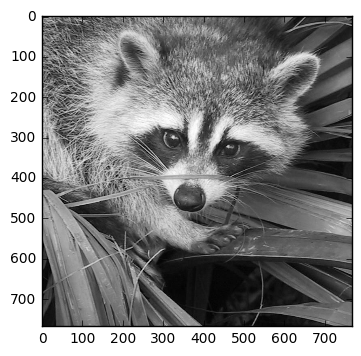

In [4]:
plt.imshow(lena, cmap=plt.cm.gray)

In [5]:
lena.shape

(768, 768)

In [6]:
lena[0, :]

array([ 0.723,  0.824,  1.025,  1.132,  0.895,  0.45 ,  0.159,  0.1  ,
       -0.185, -0.292, -0.392, -0.339, -0.143,  0.124,  0.343,  0.45 ,
        0.907,  1.405,  1.529,  1.138,  0.444, -0.446, -0.908, -0.736,
        0.011,  0.367,  0.402, -0.114, -0.47 , -0.238,  0.26 ,  0.58 ,
        0.883,  0.491,  0.064, -0.096,  0.011,  0.171,  0.171,  0.1  ,
        0.474,  0.349,  0.082, -0.292, -0.665, -0.932, -1.075, -1.11 ,
       -0.499, -0.214,  0.106,  0.207,  0.064, -0.131, -0.22 , -0.22 ,
       -0.315, -0.327, -0.339, -0.297, -0.22 , -0.161, -0.137, -0.161,
        0.07 , -0.048, -0.137, -0.226, -0.155,  0.201,  0.438,  0.367,
        0.248,  0.296,  0.402,  0.539,  0.646,  0.663,  0.58 ,  0.527,
        0.527,  0.402,  0.136, -0.025,  0.136,  0.385,  0.26 , -0.06 ,
       -0.007, -0.042,  0.171,  0.325, -0.066, -0.742, -0.956, -0.725,
       -0.558, -0.416, -0.452, -0.63 , -0.665, -0.505, -0.416, -0.517,
       -0.713, -0.73 , -0.819, -0.926, -0.897, -0.879, -1.039, -1.252,
      

In [7]:
def noise(image=lena):
    for axis in [0, 1]:
        image = np.roll(image, np.random.randint(image.shape[axis]), axis=axis)
    return image

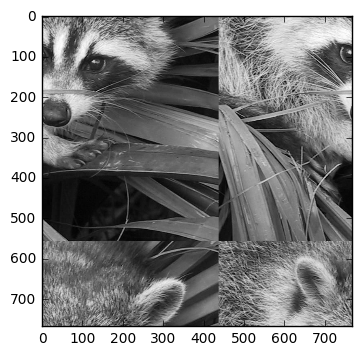

In [8]:
plt.imshow(noise(), cmap=plt.cm.gray)

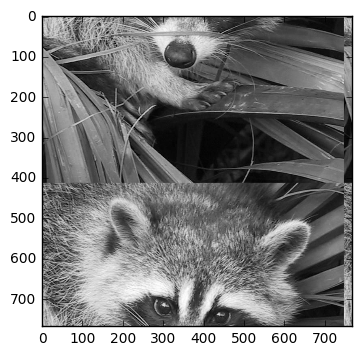

In [9]:
plt.imshow(noise(), cmap=plt.cm.gray)

## Using ARMA processes

Now, we define the ARMA process as an averaging process with a certain time constant $\tau=30.$ (in frames).

In [10]:
def ARMA(image, tau=30.):
    image = (1 - 1/tau)* image + 1/tau * noise()
    return image

initializing

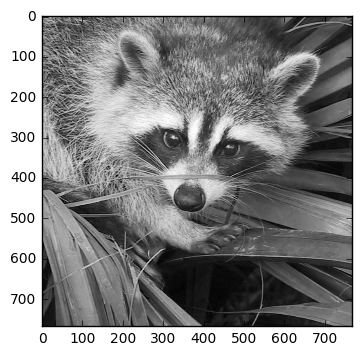

In [11]:
image = ARMA(lena)
plt.imshow(image, cmap=plt.cm.gray)

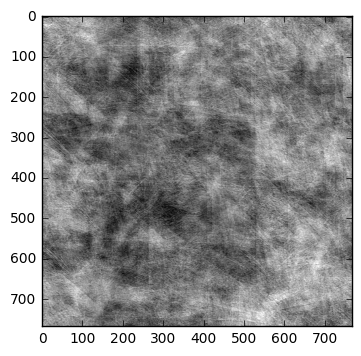

In [12]:
for _ in range(1000): image = ARMA(image)
plt.imshow(image, cmap=plt.cm.gray)

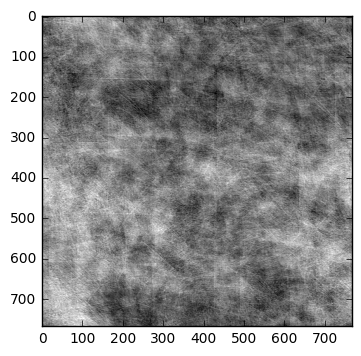

In [13]:
for _ in range(1000): image = ARMA(image)
plt.imshow(image, cmap=plt.cm.gray)

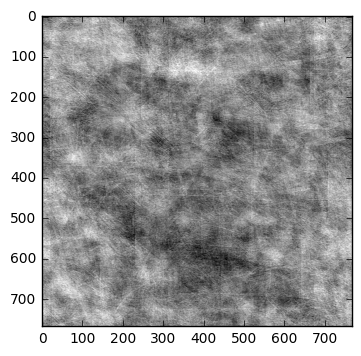

In [14]:
for _ in range(1000): image = ARMA(image)
plt.imshow(image, cmap=plt.cm.gray)

In [15]:
N_frame = 1024
z = np.zeros((lena.shape[0], lena.shape[1], N_frame))
z[:, :, 0] = image
for i_frame in range(1, N_frame): 
    z[:, :, i_frame] = ARMA(z[:, :, i_frame-1])

In [16]:
import os
name='arma'
mc.anim_save(.5 + .5*z, filename=os.path.join(mc.figpath, name))
mc.in_show_video(name)

""


In [17]:
"""
Averaging over multiple clouds 

TODO: force the phase by setting the luminance at some point and averaging over multiple instances

(c) Laurent Perrinet - INT/CNRS

"""

import MotionClouds as mc
import numpy as np
import os

name = 'concentric'

fx, fy, ft = mc.get_grids(mc.N_X, mc.N_Y, mc.N_frame)
seed = 123456
im = np.zeros((mc.N_X, mc.N_Y, mc.N_frame))
N = 20

for i_N in range(N):
    im_ = mc.rectif(mc.random_cloud(mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_theta=np.pi/4), seed=seed+i_N))
    if i_N == 0:
        phase = 0.5 + 0. * im_[0, 0, :]#mc.N_X/2, mc.N_Y/2, :]
    #im += im_ - im_[mc.N_X/2, mc.N_Y/2, :] + phase
    im += im_ - im_[0, 0, :] + phase

mc.anim_save(mc.rectif(im), os.path.join(mc.figpath, name))
mc.in_show_video(name)

""
